# XRF_PCA project

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


sns.set(style = 'ticks', font_scale = 1.2)

%matplotlib inline
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 30)


## EDA 

In [23]:
train = pd.read_csv('after_XRF.csv', encoding = 'utf-8', index_col = 0)
train.sort_values(by = 'permeability', ascending = False)

,SiO2,Al2O3,Fe2O3,CaO,MgO,K2O,Na2O,TiO2,MnO,P2O5,Ig.Loss,cat,depth(m),porosity,permeability,sum,ALK,CIA,CWI,STI,SOC,Wp,WPI
10,73.16,13.38,1.17,1.06,0.21,5.48,3.44,0.18,0.03,0.07,1.39,화강편마암,443.40,54.0,3.620000e-18,99.57,61.434978,57.277397,16.189615,0.835883,14.55,6524.476190,8.972268
19,64.54,16.16,1.49,7.04,0.64,1.15,5.75,0.37,0.05,0.13,2.32,화강편마암,882.70,72.0,3.600000e-18,99.64,16.666667,53.687708,20.413489,0.785371,17.65,5282.539683,12.620959
7,75.21,13.42,0.40,0.62,0.06,5.65,3.65,0.05,0.06,0.01,0.50,화강편마암,319.60,102.0,3.170000e-18,99.63,60.752688,57.497858,14.423366,0.845910,13.82,6700.952381,9.569958
39,73.11,14.07,1.40,1.66,0.29,4.40,3.37,0.16,0.05,0.04,1.04,화강암,889.30,103.0,7.870000e-19,99.59,56.628057,59.872340,16.738628,0.830688,15.47,5715.079365,8.815763
17,62.48,14.58,3.02,6.40,1.00,4.12,0.30,0.55,0.07,0.17,7.75,화강편마암,763.25,115.0,7.070000e-19,100.44,93.212670,57.401575,25.786539,0.786734,17.60,4492.825397,4.402380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,62.97,16.81,4.29,3.28,1.23,3.20,5.23,0.46,0.09,0.27,1.74,화강편마암,321.50,22.0,4.000000e-22,99.57,37.959668,58.941094,23.400623,0.772608,21.10,6153.809524,11.490715
1,50.83,15.85,7.36,10.12,6.68,2.22,2.70,1.12,0.16,0.21,2.28,화강편마암,21.30,9.0,4.000000e-22,99.53,45.121951,51.311104,26.735658,0.723335,23.21,5506.793651,20.066061
28,71.87,14.46,1.01,1.54,0.22,4.67,3.07,0.11,0.07,0.04,2.55,화강암,337.70,33.0,4.000000e-22,99.61,60.335917,60.909857,18.200984,0.827264,15.47,5734.730159,7.168644
27,73.66,13.48,0.95,1.61,0.19,3.71,3.45,0.12,0.05,0.03,2.40,화강암,290.00,33.0,4.000000e-22,99.65,51.815642,60.584270,17.009533,0.838993,14.43,5190.539683,6.751055


In [4]:
train_x = train[['ALK', 'CIA', 'CWI', 'STI', 'SOC', 'Wp', 'WPI', 'Ig.Loss', 'permeability']]

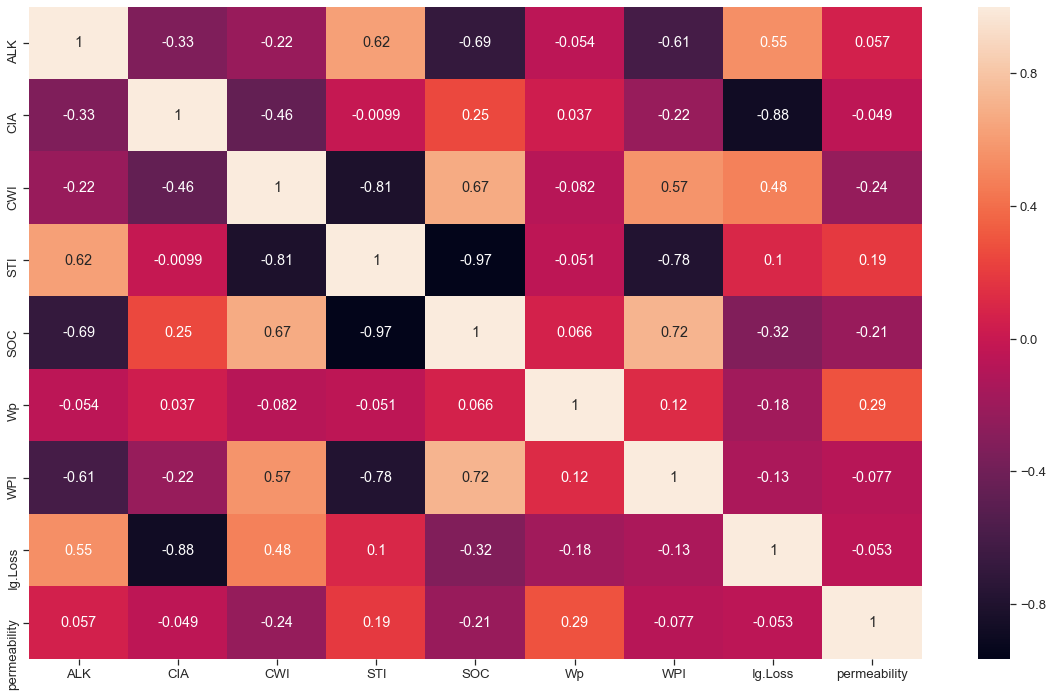

In [5]:
f, ax = plt.subplots(1, 1, figsize = (20, 12))
sns.heatmap(data = train_x.corr(), annot = True)

plt.savefig('Fig_5_1_2', dpi= 500)

## Standardization 

In [24]:
X = train[['ALK', 'CIA', 'CWI', 'STI', 'SOC', 'Wp', 'WPI', 'Ig.Loss', 'permeability']]
Y = train[['permeability']]

X.head()

,ALK,CIA,CWI,STI,SOC,Wp,WPI,Ig.Loss,permeability
0,28.516378,53.549488,26.909565,0.729525,23.78,5169.079365,18.178084,1.87,4.580000e-22
1,45.121951,51.311104,26.735658,0.723335,23.21,5506.793651,20.066061,2.28,4.000000e-22
2,40.636943,59.835144,20.216824,0.794240,18.93,5734.857143,11.023143,0.85,4.000000e-22
3,27.217742,54.231434,27.032459,0.725830,24.33,5050.476190,18.842062,1.34,4.000000e-22
4,54.609929,59.313938,15.908406,0.838594,14.70,6046.952381,8.711544,1.03,4.000000e-22


In [7]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)
x_std[:3]

array([[-1.18658446, -0.63112868,  1.44032809, -1.72614875,  1.59614373,
        -0.35503832,  2.144182  , -0.09511578, -0.42879133],
       [-0.10134367, -0.93678855,  1.40104557, -1.87921879,  1.44268317,
         0.17107922,  2.66393714,  0.0272978 , -0.4288573 ],
       [-0.39445696,  0.22720158, -0.07143694, -0.12605731,  0.29038278,
         0.52637425,  0.17444592, -0.39965687, -0.4288573 ]])

# Covariance_matrix

In [8]:
# features are columns from x_std
features = x_std.T 
covariance_matrix = np.cov(features)
print(covariance_matrix)

[[ 1.02439024 -0.33988653 -0.22284554  0.63714192 -0.71088654 -0.05533851
  -0.62022631  0.55915227  0.05808307]
 [-0.33988653  1.02439024 -0.47087319 -0.01015444  0.25504049  0.03836377
  -0.22927959 -0.89809961 -0.05022607]
 [-0.22284554 -0.47087319  1.02439024 -0.83438773  0.68920744 -0.08406328
   0.58042897  0.49461346 -0.24106284]
 [ 0.63714192 -0.01015444 -0.83438773  1.02439024 -0.9892486  -0.05220362
  -0.80057818  0.10400721  0.19080735]
 [-0.71088654  0.25504049  0.68920744 -0.9892486   1.02439024  0.06793616
   0.73718516 -0.33026014 -0.21960129]
 [-0.05533851  0.03836377 -0.08406328 -0.05220362  0.06793616  1.02439024
   0.12755232 -0.17966435  0.29461661]
 [-0.62022631 -0.22927959  0.58042897 -0.80057818  0.73718516  0.12755232
   1.02439024 -0.13810968 -0.07882692]
 [ 0.55915227 -0.89809961  0.49461346  0.10400721 -0.33026014 -0.17966435
  -0.13810968  1.02439024 -0.05446363]
 [ 0.05808307 -0.05022607 -0.24106284  0.19080735 -0.21960129  0.29461661
  -0.07882692 -0.05446

# Eigenvectors

In [9]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print('Eigenvectors \n%s' %eig_vecs)

Eigenvectors 
[[ 0.3885733  -0.26589286 -0.01388788  0.25506328 -0.36546529  0.75775543
  -0.00801123 -0.07196635 -0.00775299]
 [-0.03773638  0.58412193 -0.22021938  0.088662   -0.41453614  0.05208022
   0.07047457  0.64668135 -0.05748059]
 [-0.36562928 -0.41424936 -0.02105314  0.05043471 -0.35904564 -0.13011518
   0.63668489  0.08220107  0.36572861]
 [ 0.49955938  0.0782275  -0.01552914 -0.01107504  0.25893328 -0.07352903
  -0.0131224   0.19870885  0.79488786]
 [-0.49658661  0.06928832 -0.04279733  0.05284498 -0.30140759  0.09350294
  -0.63021987 -0.20518527  0.45288988]
 [-0.0330879   0.13273727  0.68081585  0.70301548  0.02071868 -0.14691827
   0.0102695   0.03773349  0.00122451]
 [-0.43394582 -0.08509915  0.19069152 -0.11694472  0.53017827  0.5330056
   0.03304566  0.43052924  0.05271078]
 [ 0.12093452 -0.61045423  0.02272756  0.01868205 -0.11377886 -0.29102549
  -0.43709054  0.54849096 -0.14940874]
 [ 0.11711194  0.08980088  0.66963014 -0.64293624 -0.33663671  0.04048822
  -0.0025

# Eigenvalues

In [10]:
print('\nEigenvalues \n%s' %eig_vals)


Eigenvalues 
[3.88359486e+00 2.51492058e+00 1.33213433e+00 7.13618075e-01
 5.12710579e-01 2.52566116e-01 2.47807937e-04 4.18559368e-03
 5.53425312e-03]


In [11]:
# We reduce dimension to 1 dimension, since 1 eigenvector has 73% (enough) variances
(eig_vals[0] + eig_vals[1]) / sum(eig_vals)

0.6940188704562883

# PCA

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pc = pca.fit_transform(x_std)
pc[:3]

array([[ 3.59925277,  0.88428182],
       [ 3.38007834,  1.40684592],
       [ 0.5345764 , -0.53793315]])

In [13]:
pc_y = np.c_[pc, Y]
df = pd.DataFrame(pc_y, columns = ['PC1', 'PC2', 'permeability'])
df.head()

,PC1,PC2,permeability
0,3.599253,0.884282,4.580000e-22
1,3.380078,1.406846,4.000000e-22
2,0.534576,-0.537933,4.000000e-22
3,3.857429,0.759196,4.000000e-22
4,-1.558713,-0.749457,4.000000e-22


In [14]:
coeff = np.transpose(pca.components_[0:2])
n = coeff.shape[0]
xs = df['PC1']
ys = df['PC2']
scalex = 1.0/(xs.max() - xs.min())
scaley = 1.0/(ys.max() - ys.min())

df['PC1'] =  df['PC1']*scalex
df['PC2'] =  df['PC2']*scaley
df

,PC1,PC2,permeability
0,0.482841,0.087418,4.580000e-22
1,0.453438,0.139077,4.000000e-22
2,0.071714,-0.053179,4.000000e-22
3,0.517475,0.075052,4.000000e-22
4,-0.209102,-0.074089,4.000000e-22
5,-0.004258,-0.025993,4.000000e-22
6,0.516024,0.071928,4.000000e-22
7,-0.311431,-0.115663,3.170000e-18
8,0.196334,-0.012588,4.000000e-22
9,0.411025,0.022439,4.000000e-22


# Visualization

In [15]:
pc1_eig = (eig_vals[0]) / sum(eig_vals) * 100
pc2_eig = (eig_vals[1]) / sum(eig_vals) * 100


"""
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)
"""

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${}$'.format(a, b)

D:\Teddy\Application\Anaconda\envs\teddy\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\Teddy\Application\Anaconda\envs\teddy\lib\site-packages\ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


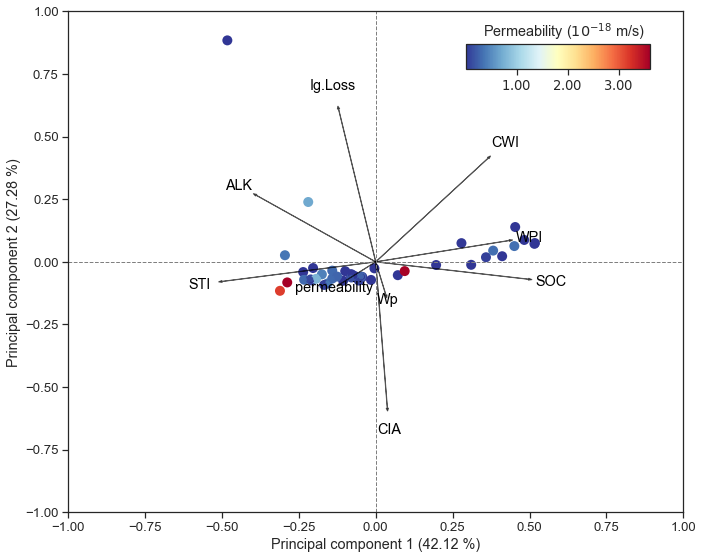

In [17]:
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib_colorbar.colorbar import Colorbar
from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm

fig = plt.figure(figsize = (10, 8))


#axins = inset_axes(ax, width='50%', height='50%', loc= 'upper right') 
sns.scatterplot(x = 'PC1', y = 'PC2', data = df, hue = 'permeability', palette = 'RdYlBu_r', s = 100, edgecolor="none",legend = False)

for i in range(n):
    plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'black', alpha = 0.6, head_width=0.008)
    plt.text(coeff[i, 0]*1.15, coeff[i, 1]*1.15, X.columns[i], color = 'black', ha = 'center', va = 'center')

    
plt.xlabel('Principal component 1 ({:.2f} %)'.format(pc1_eig))
plt.ylabel('Principal component 2 ({:.2f} %)'.format(pc2_eig))

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(y = 0, color = 'grey', linestyle='--', linewidth = 1)
plt.axvline(x = 0, color = 'grey', linestyle='--', linewidth = 1)

plt.text(.35, .9, 'Permeability ($10^{-18}$ m/s)') #fontsize = 15)



ax = fig.add_subplot(111)
points = plt.scatter(x = df['PC1'], y = df['PC2'], c = df['permeability'], s = 20, cmap = 'RdYlBu_r')
#axins1 = inset_axes(ax1, width = '10%', height = '25%', loc = 'upper right', borderpad = 3) #bbox_to_anchor=(5, 5, 1, 1)) 
axins = inset_axes(ax, width = '30%', height = '5%', loc = 'upper right', borderpad = 2.5) #bbox_to_anchor=(5, 5, 1, 1)) 
cbar = plt.colorbar(points, cax = axins, format = ticker.FuncFormatter(fmt), orientation = 'horizontal')
#cbar.ax.set_title('Permeability [$10^{-18}$ $m/s$]', verticalalignment = 'top')
plt.tight_layout()
plt.savefig('Fig_5_2', dpi=1000)


#cbar.set_label('Permeability')
#cbar.ax.tick_params(labelsize=10)
#cbar.set_ticks([1e-22, 1e-20, 1e-18])
#plt.gca().add_artist(cbar)
#axins.yaxis.set_ticks_position("right")


